In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
register_matplotlib_converters()
%matplotlib inline

,ICSA
observation_date,
1978-01-07,346000
1978-01-14,343000
1978-01-21,352000
1978-01-28,363000
1978-02-04,360000


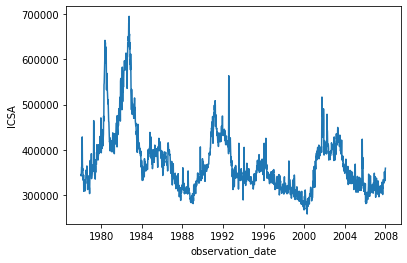

In [3]:
un_em = pd.read_excel('ICSA.xls',index_col=0)

plt.xlabel('observation_date')
plt.ylabel('ICSA')
plt.plot(un_em)
un_em.head()

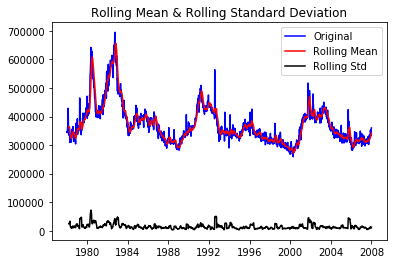

In [4]:
rolling_mean=un_em.rolling(window=10).mean()
rolling_std=un_em.rolling(window=10).std()
plt.plot(un_em, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [5]:
result = adfuller(un_em['ICSA'])

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.056387730877382
p-value: 0.029953604894517566
Critical Values:
	1%: -3.4345623007753496
	5%: -2.8634004754910296
	10%: -2.567760486450719


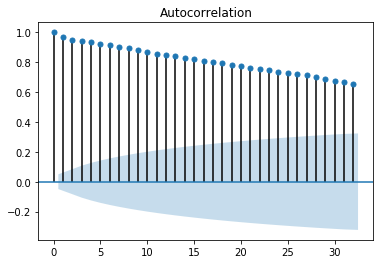

In [38]:
plot_acf(un_em);

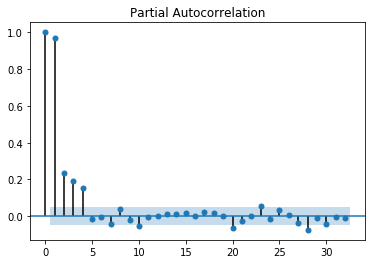

In [39]:
plot_pacf(un_em);

In [8]:
un_em_shift = un_em - un_em.shift()
un_em_shift.dropna(inplace=True)

C:\Users\driss balij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
C:\Users\driss balij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


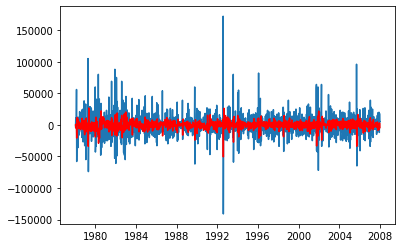

In [47]:
decomposition = seasonal_decompose(un_em) 
model = ARIMA(un_em, order=(5,1,2))
results = model.fit(disp=-1)
plt.plot(un_em_shift)
plt.plot(results.fittedvalues, color='red')

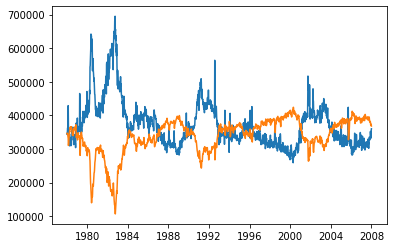

In [34]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA = pd.Series(un_em['ICSA'].iloc[0], index=un_em.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum, fill_value=0)
plt.plot(un_em)
plt.plot(predictions_ARIMA)

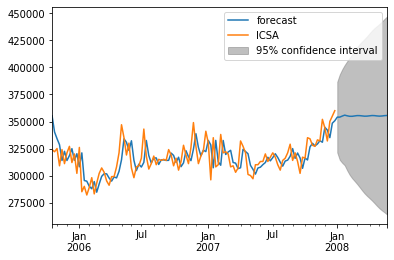

In [51]:
results.plot_predict(1450,1585);